# K-means Clustering Algo from Scratch

### Debayan Datta

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [48]:
class KMeansClustering:

    def __init__(self,k):
        self.k = k
        self.centroids = None


    def euclid_dist(data_point, centroids):
        return np.sqrt(np.sum((centroids - data_point)**2 , axis=1))
    

    # Suppose let X.shape=(100,2) hence we have 100 points (xi,yi)

    def fit(self, X, max_iterations=200):
            
        min_along_cols = np.amin(X, axis=0)         # min xi and min yj        
        max_along_cols = np.amax(X, axis=0)         # max xi and min yj
        Ksize = (self.k, X.shape[1])                # (no._of_clusters,2) since X.shape=(100,2)  
        
        self.centroids = np.random.uniform(min_along_cols, max_along_cols, size=Ksize)


        #-------------------- K MEANS ALGORITHM starts from here-----------------#
        current_iteration = 0

        while(current_iteration <= max_iterations):         
            
            cluster_lbl = []
            for data_point in X:
                distances = KMeansClustering.euclid_dist(data_point, self.centroids)       # find d((xi,yi)) with all the centroids c1,c2,c3
                cluster_num = np.argmin(distances)                                         # now get min among these and get its arg= will be cluster no.
                cluster_lbl.append(cluster_num)                                            
            
            cluster_lbl = np.array(cluster_lbl)


            cluster_indices = []
            for i in range(self.k):
                indices_reqd = np.argwhere(cluster_lbl==i)        # list of indices of the data points where this cond staisfies 
                cluster_indices.append(indices_reqd)              # [ [cluster1 indices], [cluster2 indices], [cluster3 indices], ...]
            

            cluster_centres = []
            for i,index in enumerate(cluster_indices):
                if len(index)==0:                                               # if no points are there for this cluster
                    cluster_centres.append(self.centroids[i])
                else:
                    cluster_centres.append(np.mean(X[index], axis=0)[0])           # get the centorid of all these datapoints in this cluster
            
            
            if np.max(self.centroids - np.array(cluster_centres)) < 0.0001:
                break                                                           # if change from old centroids to new centroids can cross this threshold
            else:
                self.centroids = np.array(cluster_centres)                      # updating new centroids into the centroids variable
        

            current_iteration += 1
            
            #----------------- end of the algorithm------------------------#


        return cluster_lbl,cluster_indices


## Generate a random points dataset

In [49]:
random.seed(42)
random_points = np.random.randint(0,50, (300,2))                 # taking 300 points (x,y)

x = random_points[:,0]                                           # all the 0th index values
y = random_points[:,1]                                           # all the 1st index values

[2 2 1 1 1 2 1 1 0 2 2 0 2 2 0 0 2 1 0 2 1 1 2 1 2 1 1 1 2 2] 

[array([[  1],
       [  5],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 16],
       [ 18],
       [ 22],
       [ 28],
       [ 29],
       [ 30],
       [ 32],
       [ 33],
       [ 34],
       [ 38],
       [ 39],
       [ 42],
       [ 45],
       [ 46],
       [ 47],
       [ 49],
       [ 54],
       [ 55],
       [ 58],
       [ 59],
       [ 61],
       [ 62],
       [ 64],
       [ 65],
       [ 67],
       [ 69],
       [ 75],
       [ 83],
       [ 85],
       [ 86],
       [ 89],
       [ 93],
       [ 98],
       [101],
       [103],
       [105],
       [107],
       [108],
       [109],
       [110],
       [122],
       [126],
       [128],
       [129],
       [136],
       [140],
       [141],
       [142],
       [143],
       [145],
       [147],
       [149],
       [150],
       [151],
       [152],
       [158],
       [160],
       [163],
       [165],
       [167],
       [168

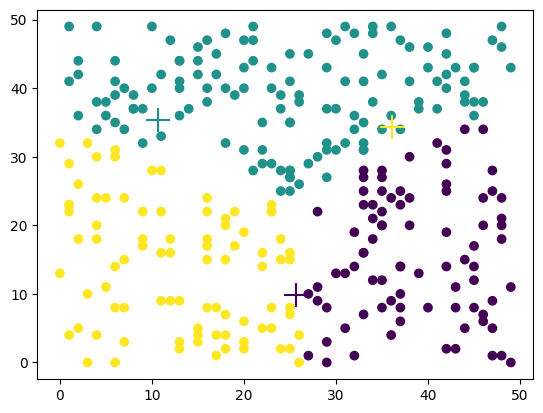

In [63]:
kmeans = KMeansClustering(k=3)
labels = kmeans.fit(random_points)[0]
indices = kmeans.fit(random_points)[1]

print(labels[:30],"\n")
print(indices)
#print(np.array(indices).shape)


plt.scatter(x,y,c=labels)
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], c= range(len(kmeans.centroids)), marker='+', s=300)
plt.show()

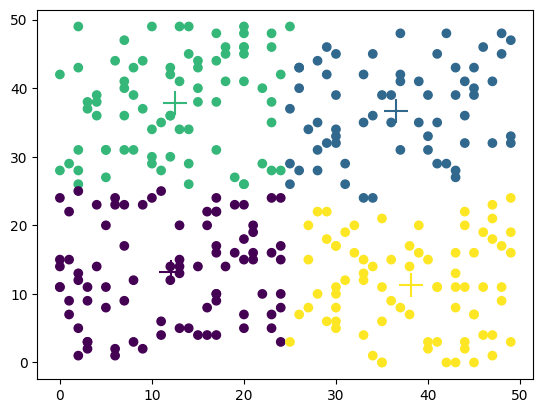

In [45]:
kmeans = KMeansClustering(k=4)
labels = kmeans.fit(random_points)

plt.scatter(x,y,c=labels)
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], c= range(len(kmeans.centroids)), marker='+', s=300)
plt.show()

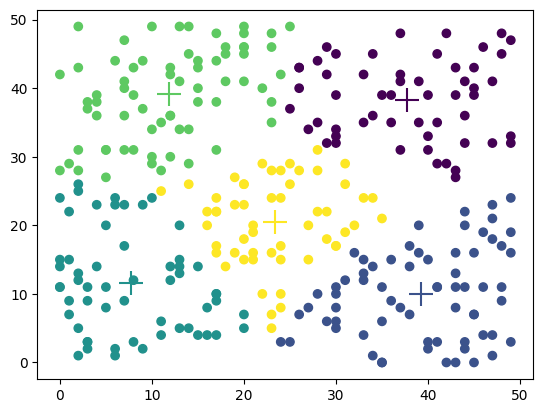

In [46]:
kmeans = KMeansClustering(k=5)
labels = kmeans.fit(random_points)

plt.scatter(x,y,c=labels)
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], c= range(len(kmeans.centroids)), marker='+', s=300)
plt.show()